# Função de Transferência de um Sensor de Posição

Andrés Marrugo, PhD<p>
Universidad Tecnológica de Bolívar.

A função de transferência de um pequeno sensor de posição é avaliada experimentalmente. O sensor é feito a partir de um ímã muito pequeno e a posição em relação à linha central (veja a Figura 1) é sentida pela força horizontal e restauradora do ímã. O ímã é mantido a uma distância fixa, h, da chapa de ferro. As medições são apresentadas na tabela seguinte.

| Deslocamento, d (mm) | 0.0 | 0.08  | 0.16  | 0.24  | 0.32  | 0.4   | 0.48  | 0.52  |
|----------------------|-------------------------------------------------------------|
|Força (mN)            | 0.0 | 0.576 | 1.147 | 1.677 | 2.187 | 2.648 | 3.089 | 3.295 |


<img src="imagens/sensor_posicao_simples.png" />

Figura 1 - Sensor de posição simples.

## Procedimentos
1. Encontre a função de transferência linear que melhor se adapta a esses dados. 
2. Encontre uma função de transferência na forma de um polinômio de segunda ordem ($d = a + bf + cf^2$), onde $d$ é o deslocamento e $f$ é a força restauradora, avaliando as constantes $a$, $b$ e $c$. 
3. Plote os dados originais juntamente com as funções de transferência em (1) e (2) e discuta os erros na escolha da aproximação.

### Solução

Vamos começar plotando os dados:

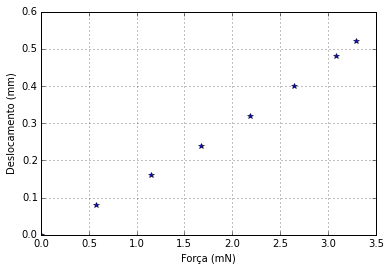

In [20]:
import matplotlib.pylab as plt
import numpy as np

d = np.array([0,0.08,0.16,0.24,0.32,0.4,0.48,0.52])         # converte uma lista em vetor
f = np.array([0,0.576,1.147,1.677,2.187,2.648,3.089,3.295]) # converte uma lista em vetor

plt.plot(f,d,'*')
plt.xlabel(u'Força (mN)'); plt.ylabel('Deslocamento (mm)')
plt.grid('on'); plt.axis([-0.5,3.5,-0.1])
plt.show()

Podemos ver que os dados são aproximadamente lineares. A função de transferência linear que melhor se ajusta aos dados é encontrada realizando um ajuste linear no sentido dos mínimos quadrados. Se voltarmos ao livro e revisarmos como realizar a aproximação linear das funções de transferência não-lineares.

In [21]:
from IPython.display import IFrame
IFrame('pdfs/linear-approximation.pdf', width='100%', height=400)

Vemos que precisamos ajustar os dados a uma linha de equação $d = a.f + b$, e precisamos calcular os coeficientes $a$ e $b$ que fornecem um melhor ajuste no sentido de mínimos quadrados. Para fazer isso em <b>python</b>, usamos a função <a href=http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html><b>polyfit</b></a>.

Os coeficientes são: a = 0.157661058706 e b = -0.0131058771534


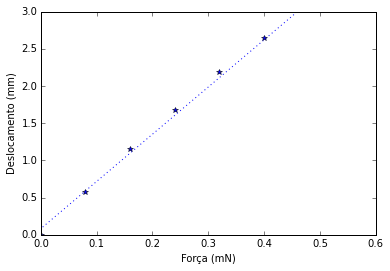

In [8]:
# polyfit calcula os coeficientes 'a' e 'b' da reta (polinômio de grau=1)
a,b = np.polyfit(f,d,1)

print u'Os coeficientes são: a =',a,'e b =',b

d1 = a*f + b
plt.plot(d1,f,':b',label='Linha Ajustada')
plt.plot(d,f,'*')
plt.ylabel('Deslocamento (mm)')
plt.xlabel(u'Força (mN)')
plt.axis([0,0.6,0,3])
plt.show()

Nós obtivemos o ajuste da reta aos dados. Vários pontos não estão exatamente na reta, portanto, há sempre um erro com relação à função de transferência ideal. Provavelmente, um ajuste de segunda ordem pode ser melhor. <p>Para a função de transferência do item (2), $y = a + b.f + c.f^2$, temos que encontrar $a$, $b$ e $c$.

In [9]:
# polyfit calcula os coeficientes 'a', 'b' e 'c' do polinômio de grau=2
c2,b2,a2 = np.polyfit(f,d,2)

print u'Os coeficientes são: a =',a2,'b =',b2,'c =',c2

Os coeficientes são: a = 0.00187368040221 b = 0.126233269703 c = 0.00926531112283


Agora vamos plotar as duas curvas...

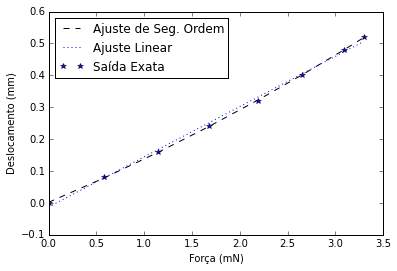

In [10]:
d2 = a2+b2*f+c2*f**2
tf2=plt.plot(f,d2,'--k',label='Ajuste de Seg. Ordem')
tf1=plt.plot(f,d1,':b',label='Ajuste Linear')
tf0=plt.plot(f,d,'*',label=u'Saída Exata')
plt.ylabel('Deslocamento (mm)')
plt.xlabel(u'Força (mN)')
plt.legend(loc='upper left')
plt.show()

Agora vamos calcular os erros...

In [14]:
# Erro do ajuste linear
erro1 = np.sum(np.abs(d - d1))/len(d)
erro1_max = np.max(np.abs(d - d1))
print u'Erro médio do Ajuste Linear : ', erro1
print u'Erro máximo do Ajuste Linear: ', erro1_max

# Erro do ajuste do polinômio de segundo grau
erro2 = np.sum(np.abs(d - d2))/len(d)
erro2_max = np.max(np.abs(d - d2))
print u'Erro médio do Ajuste de Seg. Ordem : ', erro2
print u'Erro máximo do Ajuste de Seg. Ordem: ', erro2_max


Erro médio do Ajuste Linear :  0.00877563500446
Erro máximo do Ajuste Linear:  0.0136126887162
Erro médio do Ajuste de Seg. Ordem :  0.00136479637705
Erro máximo do Ajuste de Seg. Ordem:  0.00234194838585


Devido à não linearidade dos dados, os erros médios e máximos são menores para um ajuste polinomial de segundo grau (erro 2). No entanto, o erro para um ajuste linear pode ser considerado aceitável, mantendo uma função de transferência simples e linear.

##### Traduzido por: Prof. Cláudio A. Fleury, Dez/2018

Esta página foi escrita no <a Href=https://jupyter.org/>Notebook IPython Jupyter</a>. Para baixar o notebook, clique na opção <i>Download Notebook</i> no menu superior ou obtenha no repositório do github.